In [35]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

1. 프레임 정보확인

In [37]:
carDF = pd.read_csv('./data/auto-mpg.csv', header=None)
carDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


2. Shape 확인

In [38]:
carDF.shape

(398, 9)

3. 기술통계값 확인 

In [39]:
carDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [40]:
labels = ['USA','EU','KOR']

x = [carDF[carDF['origin'] == 1]['mpg'],
carDF[carDF['origin'] == 2]['mpg'],
carDF[carDF['origin'] == 3]['mpg']]

x

[0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    27.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 249, dtype: float64,
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
        ... 
 354    34.5
 359    28.1
 360    30.7
 375    36.0
 394    44.0
 Name: mpg, Length: 70, dtype: float64,
 14     24.0
 18     27.0
 29     27.0
 31     25.0
 53     31.0
        ... 
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 390    32.0
 Name: mpg, Length: 79, dtype: float64]

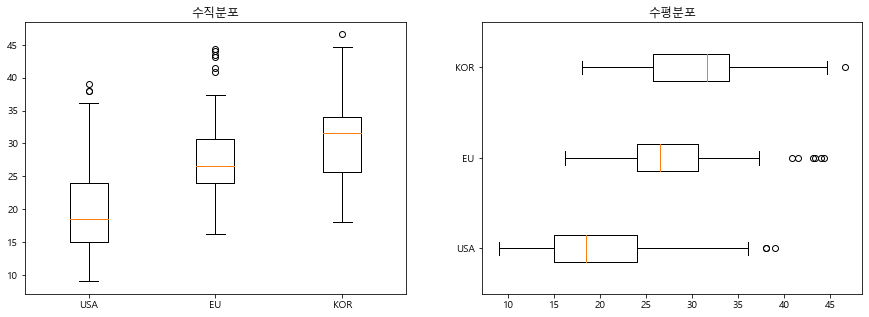

In [41]:
# 제조국가별 연비분포(수직, 수평)

fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.boxplot(x, labels=labels)
ax02.boxplot(x, labels=labels, vert=False)

ax01.set_title('수직분포')
ax02.set_title('수평분포')

plt.show()
plt.close()

### 문제01]
- 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
- 배기량이 4 이하인 자동차와 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 높은지 알아보자

In [42]:
xls = pd.ExcelFile('./data/car_mpg.xlsx')
carDF = xls.parse(xls.sheet_names[0])
carDF

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [43]:
displ_4 = carDF[carDF['displ'] <= 4]['hwy'].mean()
displ_5 = carDF[carDF['displ'] >= 5]['hwy'].mean()
print('배기량이 4 이하인 자동차의 고속도로 연비 평균은 {}이고, 5 이상인 자동차의 고속도로 연비 평균은 {}이다.'.format(displ_4, displ_5))

배기량이 4 이하인 자동차의 고속도로 연비 평균은 25.96319018404908이고, 5 이상인 자동차의 고속도로 연비 평균은 18.07894736842105이다.


In [44]:
displ = carDF.groupby(carDF.displ).agg(np.mean).loc[:, 'hwy']

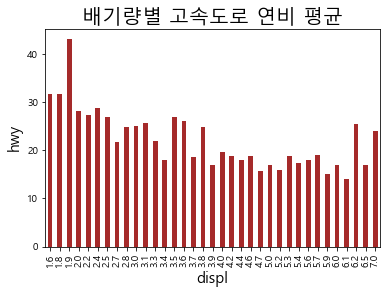

In [45]:
fig = plt.figure()

displ.plot(kind='bar', color='brown')
plt.title('배기량별 고속도로 연비 평균', size=20) 
plt.xlabel('displ', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 02]
- 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
- audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

In [46]:
audi = carDF[carDF['manufacturer'] == 'audi']['cty'].mean()
toyota = carDF[carDF['manufacturer'] == 'toyota']['cty'].mean()
print('Audi의 도시연비는 {}이고, Toyota의 도시연비는{}이다.'.format(audi, toyota))

Audi의 도시연비는 17.61111111111111이고, Toyota의 도시연비는18.529411764705884이다.


In [47]:
manu = carDF.groupby(carDF.manufacturer).agg(np.mean).loc[:, 'cty']

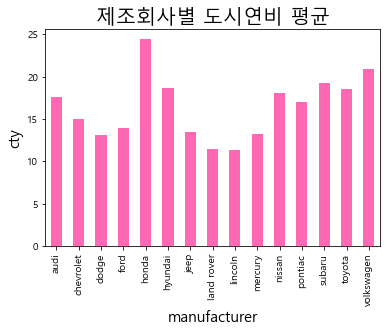

In [48]:
fig = plt.figure()

manu.plot(kind='bar', color='hotpink')
plt.title('제조회사별 도시연비 평균', size=20) 
plt.xlabel('manufacturer', size=15)
plt.ylabel('cty', size=15)

plt.show()
plt.close()

### 문제 03]
- chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
- 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.
- bar plot 이용한 시각화


- 데이터 전처리 : 연료가격 변수 추가(price_fl)
- c : 가스 2.35, d : 디젤 2.38, e : 에탄올 2.11 , p : 고급휘발유 2.76 , r : 보통휘발유 2.22

In [49]:
result = carDF.query("manufacturer == 'chevelot' or manufacturer == 'honda' or manufacturer == 'ford'")
result['hwy'].mean()

22.852941176470587

In [50]:
ex_03 = carDF.filter(['manufacturer','hwy']).groupby('manufacturer')
result_03 = ex_03.mean()
result_03

,hwy
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946
ford,19.360000
honda,32.555556
hyundai,26.857143
jeep,17.625000
land rover,16.500000
lincoln,17.000000


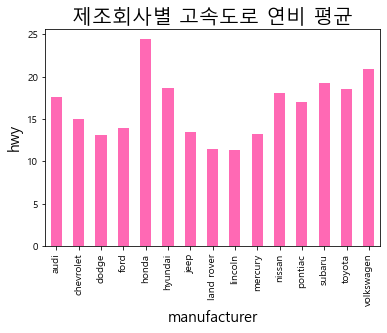

In [52]:
fig = plt.figure()

manu.plot(kind='bar', color='hotpink')
plt.title('제조회사별 고속도로 연비 평균', size=20) 
plt.xlabel('manufacturer', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 04]
- 우리가 만든 연료 가격 프레임을 원본 프레임에 병합

In [53]:
types = [(carDF['fl'] == 'c'),
         (carDF['fl'] == 'd'),
         (carDF['fl'] == 'e'),
         (carDF['fl'] == 'p'),
         (carDF['fl'] == 'r')] 

price = [2.35,2.38,2.11,2.76,2.22]

In [54]:
carDF['price_fl'] = np.select(types, price)
carDF

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


### 문제 05]
- 머지한 데이터 프레임에서 model, fl, price_fl 만 추출(필터링)
- 데이터 전처리 과정에서 결측값 확인하기

In [57]:
result_05 = carDF.filter(('model', 'fl', 'price_fl'))
result_05

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,passat,p,2.76
230,passat,p,2.76
231,passat,p,2.76
232,passat,p,2.76


In [58]:
result_05.isna().sum()

model       0
fl          0
price_fl    0
dtype: int64

### 문제 06]
- 구동방식(drv) 별 고속도로 연비(hwy)평균
- 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
- 데이터 전처리 과정에서 결측값 확인하기

In [59]:
carDF.groupby('drv').mean()['hwy']

drv
4    19.174757
f    28.160377
r    21.000000
Name: hwy, dtype: float64

In [60]:
carDF.fillna(method='ffill')

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


In [61]:
carDF.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

### 문제 07]
- hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
- bar plot 시각화

In [62]:
carDF['hwy'].isna().sum()

0

In [63]:
result_07 = carDF.groupby('drv').mean()['hwy']
result_07

drv
4    19.174757
f    28.160377
r    21.000000
Name: hwy, dtype: float64

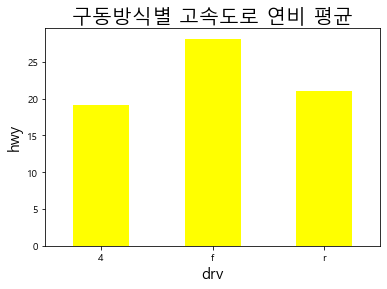

In [68]:
fig = plt.figure()

result_07.plot(kind='bar', color='yellow', rot=False)
plt.title('구동방식별 고속도로 연비 평균', size=20) 
plt.xlabel('drv', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 08]
- 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고
- 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
- hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자

In [69]:
carDF.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

In [70]:
result_08 = carDF.groupby('drv').mean()[['hwy', 'cty']]
result_08

,hwy,cty
drv,,
4,19.174757,14.330097
f,28.160377,19.971698
r,21.000000,14.080000


<Figure size 432x288 with 0 Axes>

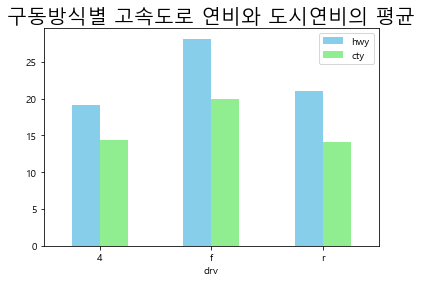

In [71]:
fig = plt.figure()

result_08.plot(kind='bar', rot=False, color=['skyblue', 'lightgreen'])
plt.title('구동방식별 고속도로 연비와 도시연비의 평균', size=20) 

plt.show()
plt.close()

### 문제 09]
- 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.
- 종류별 빈도를 막대바로 시각화 해보자
- 값의 종류별 빈도수 검사

In [72]:
result_09 = carDF.groupby('class').size()
result_09

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

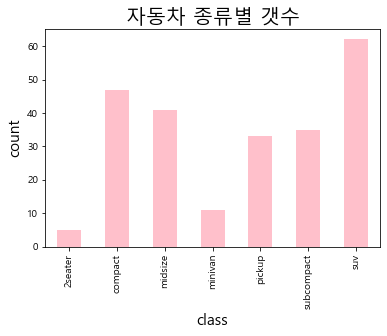

In [73]:
fig = plt.figure()

result_09.plot(kind='bar', color='pink')
plt.title('자동차 종류별 갯수', size=20) 

plt.xlabel('class', size=15)
plt.ylabel('count', size=15)

plt.show()
plt.close()

### 문제 10]
- 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지를 알아보려고 한다
- suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자
- bar plot 시각화

In [74]:
suv = carDF[carDF['class']=='suv'].groupby('manufacturer').mean()['cty']
result_10 = suv.sort_values(ascending=False).head()
result_10

manufacturer
subaru     18.833333
toyota     14.375000
nissan     13.750000
jeep       13.500000
mercury    13.250000
Name: cty, dtype: float64

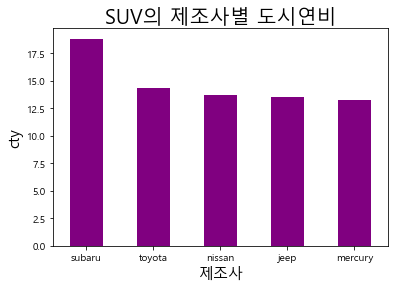

In [80]:
fig = plt.figure()

result_10.plot(kind='bar', rot=False, color='purple')
plt.title('SUV의 제조사별 도시연비', size=20) 

plt.xlabel('제조사', size=15)
plt.ylabel('cty', size=15)

plt.show()
plt.close()